In [5]:
# Academic Integrity Statement
# "I (We) certify that the code and data in this assignment were generated independently,
# using only the tools and resources defined in the course and that I (we) did not receive
# any external help, coaching or contributions during the production of this work."

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


In [7]:
#Part I: Data Analysis – income_dataset
#Step-1:
data = pd.read_csv("income.csv")
data_income = pd.DataFrame(data)

In [8]:
#Step-1a: testing to load dataset
data_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
data_income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 0, 'age')

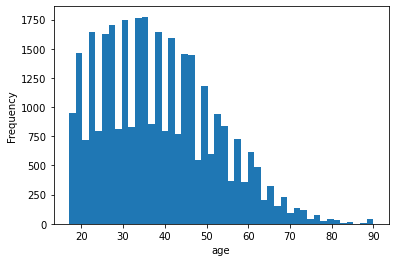

In [10]:
data_income.age.plot.hist(bins=46)
plt.xlabel("age")

<AxesSubplot:>

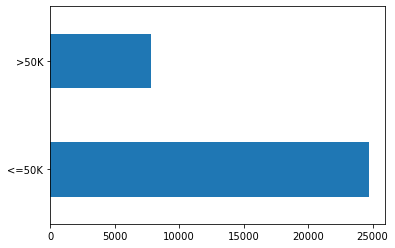

In [11]:
data_income.income.value_counts().plot(kind='barh')

<AxesSubplot:xlabel='income'>

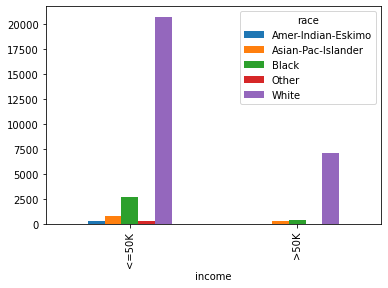

In [12]:
data_income.groupby(['race','income'])['race'].count().unstack(0).plot.bar()

In [13]:
print("Shape of Dataset is", data_income.shape)

Shape of Dataset is (32561, 15)


In [14]:
data_income.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [17]:
#the empty list signifies that there is no null values in the datset
missing = [var for var in data_income.columns if data_income[var].isnull().mean() >0 ]
missing

[]

In [18]:
# cleaning special character from data
features = ['age','workclass', 'fnlwgt','education','education.num','marital.status','occupation', 'relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country','income']
for feature in features:
    data_income[feature].fillna(data_income[feature].mode()[0],inplace=True) #cleaning NaNs
    data_income.drop(data_income.index[data_income[feature] == '?'], inplace=True)
    data.drop(data.index[data['sex'] == '.'], inplace=True)

In [19]:
data_income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [20]:
data_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [21]:
for col_name in data_income.columns:
    if data_income[col_name].dtypes == 'object':
        data_income[col_name] = data_income[col_name].astype('category') #Converting string datatypes into categorical
        unique_count = len(data_income[col_name].unique()) #find unique values in categorical values
        print("Feature '{col_name}' has {unique_count} unique categories".format(col_name=col_name, unique_count=unique_count))

Feature 'workclass' has 7 unique categories
Feature 'education' has 16 unique categories
Feature 'marital.status' has 7 unique categories
Feature 'occupation' has 14 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'native.country' has 41 unique categories
Feature 'income' has 2 unique categories


In [22]:
# Check the updated datatypes
data_income.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

In [23]:
data_income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
data_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  category
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  category
 4   education.num   30162 non-null  int64   
 5   marital.status  30162 non-null  category
 6   occupation      30162 non-null  category
 7   relationship    30162 non-null  category
 8   race            30162 non-null  category
 9   sex             30162 non-null  category
 10  capital.gain    30162 non-null  int64   
 11  capital.loss    30162 non-null  int64   
 12  hours.per.week  30162 non-null  int64   
 13  native.country  30162 non-null  category
 14  income          30162 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.9 MB


In [25]:
#renaming column name and printing the frequency of each unique value in the column
data_income.rename(columns = {'native.country':'native_country'}, inplace = True)
print(data_income['native_country'].value_counts().sort_values(ascending=False).head(10))

United-States    27504
Mexico             610
Philippines        188
Germany            128
Puerto-Rico        109
Canada             107
El-Salvador        100
India              100
Cuba                92
England             86
Name: native_country, dtype: int64


In [26]:
#majority is from United States, assuming the total sum of the remaining unique occurence to 'other'.
data_income['native_country'] = ['United-States' if x == 'United-States' else 'Other' for x in data_income['native_country']]
print(data_income['native_country'].value_counts().sort_values(ascending=False))

United-States    27504
Other             2658
Name: native_country, dtype: int64


In [27]:
#printing unique data in 'workclass'
data_income.workclass.unique()

['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay']
Categories (7, object): ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [28]:
#printing unique data in 'education'
data_income.education.unique()

['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', ..., '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

In [29]:
#printing unique data in 'marital_status'
data_income.rename(columns = {'marital.status':'marital_status'}, inplace = True)
data_income.marital_status.unique()

['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

In [30]:
#printing unique data in 'occupation'
data_income.occupation.unique()

['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 'Adm-clerical', ..., 'Tech-support', 'Protective-serv', 'Handlers-cleaners', 'Armed-Forces', 'Priv-house-serv']
Length: 14
Categories (14, object): ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', ..., 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']

In [31]:
#printing unique data in 'relationship'
data_income.relationship.unique()

['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wife']
Categories (6, object): ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

In [32]:
#printing unique data in 'race'
data_income.race.unique()

['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [33]:
#printing unique data in 'sex'
data_income.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [34]:
#printing unique data in 'income'
data_income.income.unique()

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

In [35]:
#printing unique data in 'native_country'
data_income.native_country.unique()

array(['United-States', 'Other'], dtype=object)

In [36]:
#encoding numerical values to all the categorical variables
new_data = data_income.copy()
new_data['sex'].replace(['Female', 'Male'],[1,0], inplace=True)
new_data['native_country'].replace(['United-States', 'Other'],[1,0], inplace=True)
new_data['workclass'].replace(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc','State-gov', 'Without-pay'],
                                  [7, 6, 5, 4, 3, 2, 1], inplace=True)
new_data['marital_status'].replace(['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
                                   [7,6,5,4,3,2,1], inplace=True)
new_data['race'].replace(['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'],
                         [5,4,3,2,1], inplace=True)
new_data['income'].replace(['<=50K', '>50K'],[0,1], inplace=True)
new_data['relationship'].replace(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative', 'Husband', 'Wife'],
                                 [6,5,4,3,2,1], inplace=True)
new_data['education'].replace(['HS-grad', '7th-8th', 'Some-college', '10th', 
                               'Doctorate','5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool','Bachelors','Masters','Assoc-voc','1st-4th','11th','Prof-school'],
                              [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1], inplace=True)
new_data['occupation'].replace(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty', 'Other-service', 
                                'Adm-clerical','Tech-support', 'Protective-serv', 'Handlers-cleaners', 
                                'Armed-Forces', 'Priv-house-serv','Sales','Craft-repair','Farming-fishing','Transport-moving'],
                               [14,13,12,11,10,9,8,7,6,5,4,3,2,1], inplace=True)



In [37]:
#rescaling the range of numerical values to 0 to 1
num_cols = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
new_data[num_cols] = ((new_data[num_cols] - new_data[num_cols].min())/
                        (new_data[num_cols].max() - new_data[num_cols].min()))

In [38]:
new_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital_status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native_country,income
1,0.890411,5,0.080970,16,0.533333,7,14,6,5,1,0.0,1.000000,0.173469,1,0
3,0.506849,5,0.086061,15,0.200000,6,13,5,5,1,0.0,0.895317,0.397959,1,0
4,0.328767,5,0.170568,14,0.600000,5,12,4,5,1,0.0,0.895317,0.397959,1,0
5,0.232877,5,0.138072,16,0.533333,6,11,5,5,1,0.0,0.865473,0.448980,1,0
6,0.287671,5,0.093024,13,0.333333,5,10,5,5,0,0.0,0.865473,0.397959,1,0
7,0.780822,2,0.050899,12,1.000000,4,12,3,5,1,0.0,0.845500,0.193878,1,1
8,0.698630,7,0.277540,16,0.533333,6,12,6,5,1,0.0,0.845500,0.397959,1,0
10,0.383562,5,0.107758,12,1.000000,6,12,5,4,1,0.0,0.689624,0.346939,1,1
11,0.287671,3,0.102491,1,0.933333,4,12,6,5,0,0.0,0.648301,0.448980,1,1
12,0.479452,5,0.078459,6,0.800000,7,11,6,5,1,0.0,0.648301,0.193878,1,1


In [39]:
#new_data.drop(['native_country'], axis=1)

In [40]:
X = new_data.drop(columns = 'income',axis =1)
y = new_data['income']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train= np.asarray(X_train).astype('float32')
y_train= np.asarray(y_train).astype('float32')

In [41]:
model = tf.keras.models.Sequential(
    [
     #tf.keras.layers.Flatten(),
     #tf.keras.layers.Dense(512,activation = 'relu'),
     #tf.keras.layers.Dense(64,activation = 'relu'),
     tf.keras.layers.Dense(128,activation = 'relu'),
     tf.keras.layers.Dense(32,activation = 'sigmoid'),
     tf.keras.layers.Dense(8,activation = 'softmax')
    ])

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

my_model = model.fit(X_train,y_train,epochs = 100, validation_data=(X_train,y_train),batch_size=16)

Epoch 1/100
1263/1263 [==============================] - 3s 2ms/step - loss: 0.4480 - accuracy: 0.8067 - val_loss: 0.3973 - val_accuracy: 0.8198
Epoch 2/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.3887 - accuracy: 0.8216 - val_loss: 0.3712 - val_accuracy: 0.8284
Epoch 3/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.3704 - accuracy: 0.8274 - val_loss: 0.3689 - val_accuracy: 0.8226
Epoch 4/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.3596 - accuracy: 0.8327 - val_loss: 0.3502 - val_accuracy: 0.8335
Epoch 5/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.3517 - accuracy: 0.8364 - val_loss: 0.3451 - val_accuracy: 0.8379
Epoch 6/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.3498 - accuracy: 0.8378 - val_loss: 0.3520 - val_accuracy: 0.8387
Epoch 7/100
1263/1263 [==============================] - 2s 2ms/step - loss: 0.3472 - accuracy: 0.8391 - val_loss: 0.3374 - val_ac

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc= test_acc*100
test_loss = test_loss*100
print("The test accuracy :",test_acc)
print("The test loss :", test_loss)

312/312 [==============================] - 0s 1ms/step - loss: 0.3358 - accuracy: 0.8458
The test accuracy : 84.57906246185303
The test loss : 33.584797382354736


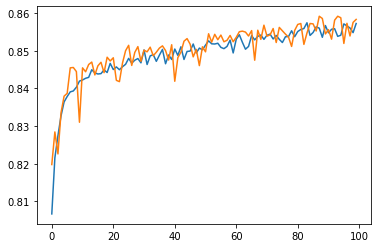

In [46]:
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])

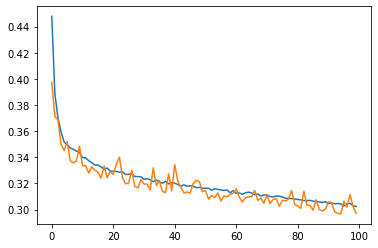

In [44]:
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])

In [ ]:
# References:

# https://numpy.org/doc/stable/reference/
# https://pandas.pydata.org/docs/reference/
# https://matplotlib.org/stable/index.html
# https://docs.python.org/3.9/library/index.html
# https://keras.io/api/models/model/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split